# December 17, 2021

Analyze diffusion tensors calculated by BEST on 7/30/21 for $c=0.25$ by extrapolation to $1/N = 0$.

This notebook parallels `jf080321/analyze_diffusion_tensor.ipynb` which examined the diffusion tensors for $c=0.5$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('/Users/jfung/code/best_dev/')
from read_best_output import read_best_file

In [2]:
import glob

In [3]:
best_files = glob.glob('../jf073021/*.be')

In [4]:
best_files

['../jf073021/asym_trimer_073021_c025_8568.be',
 '../jf073021/asym_trimer_073021_c025_6588.be',
 '../jf073021/asym_trimer_073021_c025_2628.be',
 '../jf073021/asym_trimer_073021_c025_5268.be',
 '../jf073021/asym_trimer_073021_c025_1308.be',
 '../jf073021/asym_trimer_073021_c025_3948.be',
 '../jf073021/asym_trimer_073021_c025_7908.be']

In [5]:
best_files.sort()

In [6]:
best_files

['../jf073021/asym_trimer_073021_c025_1308.be',
 '../jf073021/asym_trimer_073021_c025_2628.be',
 '../jf073021/asym_trimer_073021_c025_3948.be',
 '../jf073021/asym_trimer_073021_c025_5268.be',
 '../jf073021/asym_trimer_073021_c025_6588.be',
 '../jf073021/asym_trimer_073021_c025_7908.be',
 '../jf073021/asym_trimer_073021_c025_8568.be']

In [7]:
n_triangles = []
dtts = []
dtrs = []
drrs = []
centroids = []
rcrs = []
rcds = []

In [8]:
for fname in best_files:
    n_t, dtt, dtr, drr, centroid, rcr, rcd = read_best_file(fname)
    n_triangles.append(n_t)
    dtts.append(dtt)
    dtrs.append(dtr)
    drrs.append(drr)
    centroids.append(centroid)
    rcrs.append(rcr)
    rcds.append(rcd)

In [9]:
n_triangles

[1308, 2628, 3948, 5268, 6588, 7908, 8568]

In [10]:
n_triangles = np.array(n_triangles)

In [11]:
n_triangles

array([1308, 2628, 3948, 5268, 6588, 7908, 8568])

In [12]:
dtts[-1]

array([[ 9.2040e-01, -1.4722e-07,  1.4630e-07],
       [-1.3743e-07,  9.1762e-01,  1.2328e-08],
       [ 1.3083e-07, -9.0675e-08,  1.0336e+00]])

By symmetry (see my PhD thesis, or Happel & Brenner), the following holds:

* $D_{tt}$ and $D_{rr}$ are both diagonal
* $D_{tr}$ has only two nonzero elements

Start with $D_{tt}$:

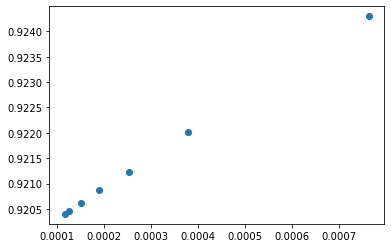

In [13]:
plt.plot(1/n_triangles, np.array([dtt[0,0] for dtt in dtts]), 'o')

In [14]:
from scipy.stats import linregress

In [24]:
dtt11_fit = linregress(1/n_triangles[1:], np.array([dtt[0,0] for dtt in dtts[1:]]))
print(dtt11_fit)

LinregressResult(slope=6.1269211589061525, intercept=0.9196856280495341, rvalue=0.9997613278476511, pvalue=8.5439796552713e-08, stderr=0.06694311547278574, intercept_stderr=1.4909884261575923e-05)


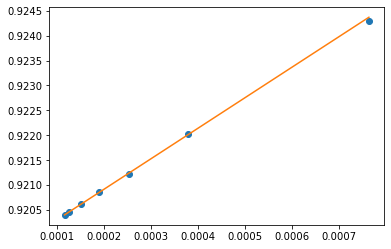

In [25]:
plt.plot(1/n_triangles, np.array([dtt[0,0] for dtt in dtts]), 'o')
plt.plot(1/n_triangles, dtt11_fit.intercept + dtt11_fit.slope / n_triangles)

In [28]:
dtt22_fit = linregress(1/n_triangles[1:], np.array([dtt[1,1] for dtt in dtts[1:]]))
print(dtt22_fit)

LinregressResult(slope=6.558021223584151, intercept=0.9168530720300563, rvalue=0.999803787911482, pvalue=5.774499851830757e-08, stderr=0.06496577414322983, intercept_stderr=1.4469481538142855e-05)


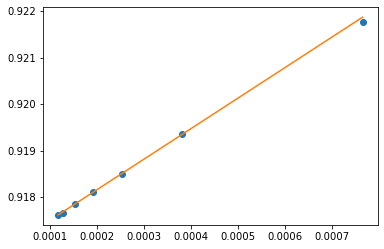

In [29]:
plt.plot(1/n_triangles, np.array([dtt[1,1] for dtt in dtts]), 'o')
plt.plot(1/n_triangles, dtt22_fit.intercept + dtt22_fit.slope / n_triangles)

In [30]:
dtt33_fit = linregress(1/n_triangles[1:], np.array([dtt[2,2] for dtt in dtts[1:]]))
print(dtt33_fit)

LinregressResult(slope=7.559060323154094, intercept=1.0327480952595842, rvalue=0.9994366371134898, pvalue=4.759772134251856e-07, stderr=0.12692012441115322, intercept_stderr=2.826824464428177e-05)


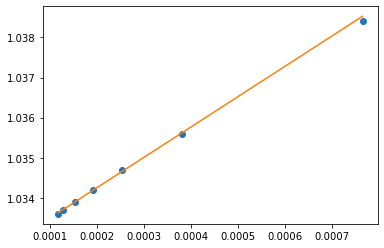

In [31]:
plt.plot(1/n_triangles, np.array([dtt[2,2] for dtt in dtts]), 'o')
plt.plot(1/n_triangles, dtt33_fit.intercept + dtt33_fit.slope / n_triangles)

In [32]:
dtt_diag = np.array([dtt11_fit.intercept, dtt22_fit.intercept, dtt33_fit.intercept])

In [33]:
dtt_diag

array([0.91968563, 0.91685307, 1.0327481 ])

Now let's do $D_{rr}$.

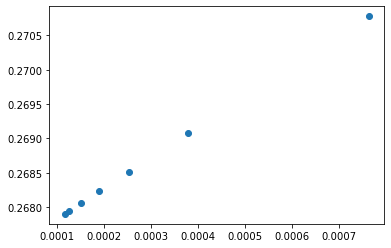

In [34]:
plt.plot(1/n_triangles, np.array([drr[0,0] for drr in drrs]), 'o')

In [35]:
drr11_fit = linregress(1/n_triangles[1:], np.array([drr[0,0] for drr in drrs[1:]]))
drr22_fit = linregress(1/n_triangles[1:], np.array([drr[1,1] for drr in drrs[1:]]))
drr33_fit = linregress(1/n_triangles[1:], np.array([drr[2,2] for drr in drrs[1:]]))

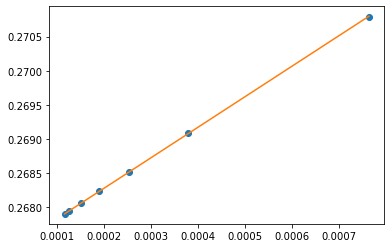

In [36]:
plt.plot(1/n_triangles, np.array([drr[0,0] for drr in drrs]), 'o')
plt.plot(1/n_triangles, drr11_fit.intercept + drr11_fit.slope / n_triangles)

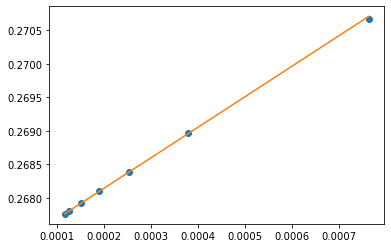

In [37]:
plt.plot(1/n_triangles, np.array([drr[1,1] for drr in drrs]), 'o')
plt.plot(1/n_triangles, drr22_fit.intercept + drr22_fit.slope / n_triangles)

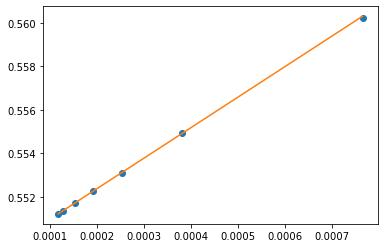

In [38]:
plt.plot(1/n_triangles, np.array([drr[2,2] for drr in drrs]), 'o')
plt.plot(1/n_triangles, drr33_fit.intercept + drr33_fit.slope / n_triangles)

In [39]:
drr_diag = np.array([drr11_fit.intercept, drr22_fit.intercept, drr33_fit.intercept])

In [40]:
drr_diag

array([0.26737808, 0.26722888, 0.54958732])

And now let's do $D_{tr}$.

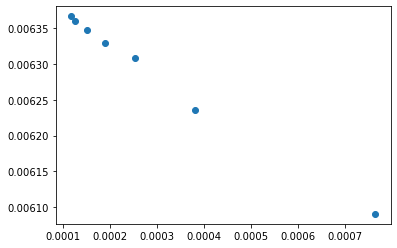

In [41]:
plt.plot(1/n_triangles, np.array([dtr[1,2] for dtr in dtrs]), 'o')

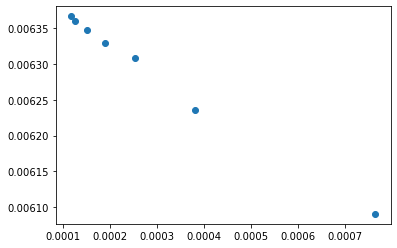

In [42]:
plt.plot(1/n_triangles, np.array([dtr[2,1] for dtr in dtrs]), 'o')

In [36]:
dtrs[-3]

array([[ 2.7278e-11,  2.9844e-09,  4.0214e-06],
       [ 8.3532e-08, -6.3317e-08,  1.2759e-02],
       [ 4.0313e-06,  1.2759e-02, -2.2887e-05]])

I think the code explicitly makes $D_{tr}$ symmetric...

In [45]:
dtr_fit = linregress(1/n_triangles[1:], np.array([dtr[1,2] for dtr in dtrs[1:]]))

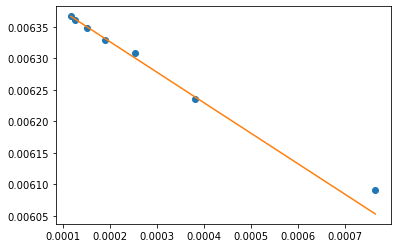

In [46]:
plt.plot(1/n_triangles, np.array([dtr[1,2] for dtr in dtrs]), 'o')
plt.plot(1/n_triangles, dtr_fit.intercept + dtr_fit.slope/n_triangles)

In [47]:
dtr_extrapolated = np.zeros((3,3))
dtr_extrapolated[1,2] = dtr_fit.intercept
dtr_extrapolated[2,1] = dtr_fit.intercept
dtr_extrapolated

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00642332],
       [0.        , 0.00642332, 0.        ]])

Save the results.

In [48]:
print(dtt_diag)
np.save('asym_trimer_c025_dtt_diag.npy', dtt_diag)
print(drr_diag)
np.save('asym_trimer_c025_drr_diag.npy', drr_diag)
print(dtr_extrapolated)
np.save('asym_trimer_c025_dtr.npy', dtr_extrapolated)

[0.91968563 0.91685307 1.0327481 ]
[0.26737808 0.26722888 0.54958732]
[[0.         0.         0.        ]
 [0.         0.         0.00642332]
 [0.         0.00642332 0.        ]]


We also need the center of diffusion...

In [49]:
centroids

[array([ 1.4957e-02, -2.4192e-05,  2.0750e-16]),
 array([ 1.5853e-02, -4.9604e-05, -1.4401e-16]),
 array([ 1.6242e-02, -2.5568e-05, -7.9931e-17]),
 array([ 1.6392e-02, -2.0471e-05, -9.1704e-16]),
 array([ 1.6502e-02, -7.3525e-06,  2.3124e-16]),
 array([ 1.6573e-02, -1.2955e-05,  1.3128e-16]),
 array([ 1.6606e-02, -6.9284e-06,  2.3104e-16])]

In [50]:
rcds

[array([ 1.0872e-02, -2.5047e-05,  3.6486e-08]),
 array([ 1.1237e-02, -2.5151e-05, -8.4303e-09]),
 array([ 1.1404e-02, -1.7928e-05, -7.1427e-09]),
 array([ 1.1461e-02, -1.0241e-05, -1.3922e-08]),
 array([ 1.1507e-02, -5.3482e-06,  4.0027e-09]),
 array([ 1.1536e-02, -6.5074e-06,  1.0044e-08]),
 array([ 1.1551e-02, -4.9589e-06, -6.2766e-09])]

We're given the centroids (relative to origin), CRs (relative to centroid), and CDs (relative to centroid). Add up all these vectors to get CD relative to origin.

In [51]:
r_cd_origins = np.array([cen + rcr + rcd for (cen, rcr, rcd) in zip(centroids, rcrs, rcds)])

In [52]:
r_cd_origins

array([[ 8.80200000e-03, -1.67430000e-05, -8.07131400e-06],
       [ 9.48500000e-03, -3.85330000e-05,  6.67929700e-07],
       [ 9.77900000e-03, -1.75400000e-05, -1.38382700e-07],
       [ 9.89500000e-03, -1.58730000e-05,  1.06767999e-07],
       [ 9.98000000e-03, -5.17130000e-06,  2.67582700e-07],
       [ 1.00340000e-02, -1.00248000e-05, -1.81949999e-08],
       [ 1.00590000e-02, -4.78150000e-06, -1.08234998e-08]])

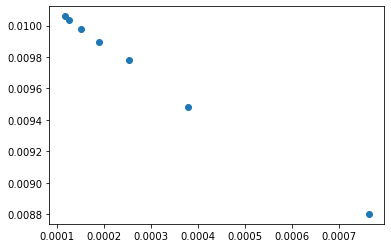

In [55]:
plt.plot(1/n_triangles, r_cd_origins[:,0], 'o')

In [56]:
cd_fit = linregress(1/n_triangles[1:], r_cd_origins[1:,0])

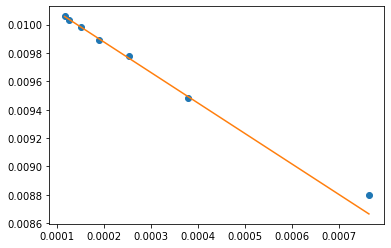

In [57]:
plt.plot(1/n_triangles, r_cd_origins[:,0], 'o')
plt.plot(1/n_triangles, cd_fit.intercept + cd_fit.slope/n_triangles)

In [58]:
extrapolated_cd = np.array([cd_fit.intercept, 0, 0])

In [59]:
extrapolated_cd

array([0.01030842, 0.        , 0.        ])

In [60]:
np.diag(dtt_diag)

array([[0.91968563, 0.        , 0.        ],
       [0.        , 0.91685307, 0.        ],
       [0.        , 0.        , 1.0327481 ]])

In [61]:
np.savetxt('asym_trimer_c025_dtt.txt', np.diag(dtt_diag))

In [62]:
np.savetxt('asym_trimer_c025_drr.txt', np.diag(drr_diag))
np.savetxt('asym_trimer_c025_dtr.txt', dtr_extrapolated)
np.savetxt('asym_trimer_c025_cd.txt', extrapolated_cd)
np.save('asym_trimer_c025_cd.npy', extrapolated_cd)

Done with analysis!